# Machine Learning for Finance Freestyle

In this lab you'll be given the opportunity to apply everything you have learned to build a trading strategy for SP500 stocks. First, let's introduce the dataset you'll be using.

## The Data

Use BigQuery's magic function to pull data as follows:

    Dataset Name: ml4f
    Table Name: percent_change_sp500

The following query will pull 10 rows of data from the table:

In [25]:
%%bigquery df
SELECT 
    *
FROM
    `cloud-training-prod-bucket.ml4f.percent_change_sp500`
LIMIT
    10000

In [2]:
df.head()

,symbol,Date,Open,Close,tomorrow_close,tomo_close_m_close,close_MIN_prior_5_days,close_MIN_prior_20_days,close_MIN_prior_260_days,close_MAX_prior_5_days,...,close_STDDEV_prior_20_days,close_STDDEV_prior_260_days,close_values_prior_260,days_on_market,scaled_change,s_p_scaled_change,normalized_change,company,industry,direction
0,AA,2004-09-13,30.76,30.79,30.70,-0.09,0.998701,0.962325,0.849627,1.081195,...,0.029852,0.092995,"[28.56, 28.62, 28.29, 28.09, 27.99, 28.2, 28.5...",10748,-0.002923,0.002229,-0.005153,Alcoa Inc,Materials,STAY
1,CSC,1994-09-22,42.50,42.87,43.37,0.50,0.994168,0.982505,0.763937,1.029158,...,0.020679,0.605874,"[90.37, 89.25, 90.87, 90.37, 90.12, 89.75, 88....",3219,0.011663,-0.003469,0.015132,Computer Sciences,Information Technology,UP
2,ALTR,1992-09-08,9.25,9.00,8.75,-0.25,1.000000,0.972222,0.972222,1.042222,...,0.117427,0.805250,"[23.5, 23.37, 23.37, 23.5, 23.5, 22.87, 22.5, ...",1122,-0.027778,0.004633,-0.032411,Altera Corp,Information Technology,DOWN
3,APD,2010-02-17,70.48,70.18,69.95,-0.23,0.968225,0.968225,0.624109,1.003277,...,0.072852,0.153308,"[52.55, 54.13, 55.4, 55.85, 52.8, 52.25, 54.53...",6778,-0.003277,0.006585,-0.009862,Air Products & Chemicals Inc,Materials,STAY
4,CBE,1989-07-26,22.86,23.32,23.59,0.27,0.984134,0.952830,0.866638,1.051029,...,0.024737,0.320813,"[38.76, 38.58, 38.41, 38.14, 37.61, 38.23, 38....",1913,0.011578,0.011655,-0.000077,Cooper Industries Plc,Industrials,STAY


As you can see, the table contains daily open and close data for SP500 stocks. The table also contains some features that have been generated for you using [navigation functions](https://cloud.google.com/bigquery/docs/reference/standard-sql/navigation_functions) and [analytic functions](https://cloud.google.com/bigquery/docs/reference/standard-sql/analytic-function-concepts). Let's dig into the schema a bit more. 

In [3]:
%%bigquery 
SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable)
FROM
    `cloud-training-prod-bucket.ml4f`.INFORMATION_SCHEMA.COLUMNS
WHERE
    table_name = "percent_change_sp500"

,table_catalog,table_schema,table_name,column_name,ordinal_position,is_nullable,data_type,is_hidden,is_system_defined,is_partitioning_column,clustering_ordinal_position
0,cloud-training-prod-bucket,ml4f,percent_change_sp500,symbol,1,YES,STRING,NO,NO,NO,NaN
1,cloud-training-prod-bucket,ml4f,percent_change_sp500,Date,2,YES,DATE,NO,NO,NO,NaN
2,cloud-training-prod-bucket,ml4f,percent_change_sp500,Open,3,YES,FLOAT64,NO,NO,NO,NaN
3,cloud-training-prod-bucket,ml4f,percent_change_sp500,Close,4,YES,FLOAT64,NO,NO,NO,NaN
4,cloud-training-prod-bucket,ml4f,percent_change_sp500,tomorrow_close,5,YES,FLOAT64,NO,NO,NO,NaN
5,cloud-training-prod-bucket,ml4f,percent_change_sp500,tomo_close_m_close,6,YES,FLOAT64,NO,NO,NO,NaN
6,cloud-training-prod-bucket,ml4f,percent_change_sp500,close_MIN_prior_5_days,7,YES,FLOAT64,NO,NO,NO,NaN
7,cloud-training-prod-bucket,ml4f,percent_change_sp500,close_MIN_prior_20_days,8,YES,FLOAT64,NO,NO,NO,NaN
8,cloud-training-prod-bucket,ml4f,percent_change_sp500,close_MIN_prior_260_days,9,YES,FLOAT64,NO,NO,NO,NaN
9,cloud-training-prod-bucket,ml4f,percent_change_sp500,close_MAX_prior_5_days,10,YES,FLOAT64,NO,NO,NO,NaN


Most of the features, like `open` and `close` are pretty straightforward. The features generated using analytic functions, such as `close_MIN_prior_5_days` are best described using an example. Let's take the 6 most recent rows of data for IBM and reproduce the `close_MIN_prior_5_days` column. 

In [4]:
%%bigquery
SELECT 
    *
FROM
    `cloud-training-prod-bucket.ml4f.percent_change_sp500`
WHERE
    symbol = 'IBM'
ORDER BY 
    Date DESC
LIMIT 6

,symbol,Date,Open,Close,tomorrow_close,tomo_close_m_close,close_MIN_prior_5_days,close_MIN_prior_20_days,close_MIN_prior_260_days,close_MAX_prior_5_days,...,close_STDDEV_prior_20_days,close_STDDEV_prior_260_days,close_values_prior_260,days_on_market,scaled_change,s_p_scaled_change,normalized_change,company,industry,direction
0,IBM,2013-02-01,204.65,205.18,NaN,NaN,0.989716,0.937323,0.879813,0.998977,...,0.025808,0.031267,"[180.52, 188.52, 189.98, 191.93, 191.73, 190.9...",12860,NaN,-0.011539,NaN,Intl Business Machines Corp,Information Technology,STAY
1,IBM,2013-01-31,203.32,203.07,205.18,2.11,1.002216,0.947063,0.888955,1.009356,...,0.025220,0.031925,"[181.07, 180.52, 188.52, 189.98, 191.93, 191.7...",12859,0.010391,0.010053,0.000338,Intl Business Machines Corp,Information Technology,STAY
2,IBM,2013-01-30,203.69,203.52,203.07,-0.45,1.001867,0.941185,0.884434,1.007125,...,0.024643,0.032221,"[180.0, 181.07, 180.52, 188.52, 189.98, 191.93...",12858,-0.002211,-0.002563,0.000352,Intl Business Machines Corp,Information Technology,STAY
3,IBM,2013-01-29,204.34,203.90,203.52,-0.38,0.961648,0.930996,0.878666,1.005248,...,0.023987,0.032552,"[179.16, 180.0, 181.07, 180.52, 188.52, 189.98...",12857,-0.001864,-0.003900,0.002036,Intl Business Machines Corp,Information Technology,STAY
4,IBM,2013-01-28,204.85,204.93,203.90,-1.03,0.948958,0.926316,0.874250,1.000195,...,0.021542,0.032677,"[180.55, 179.16, 180.0, 181.07, 180.52, 188.52...",12856,-0.005026,0.005106,-0.010132,Intl Business Machines Corp,Information Technology,DOWN
5,IBM,2013-01-25,204.45,204.97,204.93,-0.04,0.944772,0.926136,0.874079,0.998780,...,0.018510,0.032874,"[182.32, 180.55, 179.16, 180.0, 181.07, 180.52...",12855,-0.000195,-0.001850,0.001655,Intl Business Machines Corp,Information Technology,STAY


For `Date = 2013-02-01` how did we arrive at `close_MIN_prior_5_days = 0.989716`? The minimum close over the past five days was `203.07`. This is normalized by the current day's close of `205.18` to get `close_MIN_prior_5_days = 203.07 / 205.18 = 0.989716`. The other features utilizing analytic functions were generated in a similar way. Here are explanations for some of the other features:

* __scaled_change__: `tomo_close_m_close / close`
* __s_p_scaled_change__: This value is calculated the same way as `scaled_change` but for the S&P 500 index. 
* __normalized_change__: `scaled_change - s_p_scaled_change` The normalization using the S&P index fund helps ensure that the future price of a stock is not due to larger market effects. Normalization helps us isolate the factors contributing to the performance of a stock_market.
* __direction__: This is the target variable we're trying to predict. The logic for this variable is as follows: 

    ```sql
    CASE 
        WHEN normalized_change < -0.01 THEN 'DOWN'
        WHEN normalized_change > 0.01 THEN 'UP'
        ELSE 'STAY'
    END AS direction
    ```

## Create classification model for `direction`

In this example, your job is to create a classification model to predict the `direction` of each stock. Be creative! You can do this in any number of ways. For example, you can use BigQuery, Scikit-Learn, or AutoML. Feel free to add additional features, or use time series models.   



### Establish a Simple Benchmark

One way to assess the performance of a model is to compare it to a simple benchmark. We can do this by seeing what kind of accuracy we would get using the naive strategy of just predicting the majority class. Across the entire dataset, the majority class is 'STAY'. Using the following query we can see how this naive strategy would perform.

In [5]:
%%bigquery
WITH subset as (
    SELECT 
        Direction
    FROM
        `cloud-training-prod-bucket.ml4f.percent_change_sp500`
    WHERE
        tomorrow_close IS NOT NULL
)
SELECT 
    Direction,
    100.0 * COUNT(*) / (SELECT COUNT(*) FROM subset) as percentage
FROM
    subset
GROUP BY
    Direction

,Direction,percentage
0,STAY,53.766049
1,UP,23.240681
2,DOWN,22.993271


So, the naive strategy of just guessing the majority class would have accuracy of around 54% across the entire dataset. See if you can improve on this. 

### Train Your Own Model

In [26]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rc('figure', figsize=(12, 8.0))

In [27]:
df.head()

,symbol,Date,Open,Close,tomorrow_close,tomo_close_m_close,close_MIN_prior_5_days,close_MIN_prior_20_days,close_MIN_prior_260_days,close_MAX_prior_5_days,...,close_STDDEV_prior_20_days,close_STDDEV_prior_260_days,close_values_prior_260,days_on_market,scaled_change,s_p_scaled_change,normalized_change,company,industry,direction
0,CSC,1994-09-22,42.50,42.87,43.37,0.50,0.994168,0.982505,0.763937,1.029158,...,0.020679,0.605874,"[90.37, 89.25, 90.87, 90.37, 90.12, 89.75, 88....",3219,0.011663,-0.003469,0.015132,Computer Sciences,Information Technology,UP
1,A,2009-05-21,18.22,17.68,17.69,0.01,0.998303,0.927602,0.703620,1.054299,...,0.049348,0.489701,"[31.9, 32.37, 32.23, 32.53, 35.34, 35.09, 36.2...",2390,0.000566,-0.001497,0.002063,Agilent Technologies Inc,Health Care,STAY
2,ANF,1999-12-30,28.50,28.12,26.69,-1.43,0.871266,0.862376,0.775605,0.977952,...,0.084508,0.879128,"[60.0, 60.75, 63.0, 64.94, 61.5, 63.56, 63.75,...",823,-0.050853,0.003264,-0.054117,Abercrombie & Fitch Company A,Consumer Discretionary,DOWN
3,AMZN,2004-12-14,40.15,40.44,41.00,0.56,0.944609,0.940900,0.836548,0.984916,...,0.019816,0.139052,"[53.93, 51.51, 51.8, 51.56, 51.08, 49.34, 49.2...",1899,0.013848,0.001945,0.011903,Amazon.com Inc,Consumer Discretionary,UP
4,DNB,1985-07-10,17.47,17.29,17.08,-0.21,0.976865,0.926547,0.690573,1.013881,...,0.023376,0.082239,"[12.32, 12.14, 12.27, 12.24, 12.24, 12.09, 12....",527,-0.012146,0.002963,-0.015109,Dun & Bradstreet Corp,Industrials,DOWN


In [28]:
df['Date'] =  pd.to_datetime(df['Date'])

In [29]:
# TODO: Write code to build a model to predict Direction

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   symbol                       10000 non-null  object        
 1   Date                         10000 non-null  datetime64[ns]
 2   Open                         10000 non-null  float64       
 3   Close                        10000 non-null  float64       
 4   tomorrow_close               9997 non-null   float64       
 5   tomo_close_m_close           9997 non-null   float64       
 6   close_MIN_prior_5_days       10000 non-null  float64       
 7   close_MIN_prior_20_days      10000 non-null  float64       
 8   close_MIN_prior_260_days     10000 non-null  float64       
 9   close_MAX_prior_5_days       10000 non-null  float64       
 10  close_MAX_prior_20_days      10000 non-null  float64       
 11  close_MAX_prior_260_days     10000 non-nul

In [31]:
print(type(df))
df.dropna(inplace=True)
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.head()

<class 'pandas.core.frame.DataFrame'>


,symbol,Date,Open,Close,tomorrow_close,tomo_close_m_close,close_MIN_prior_5_days,close_MIN_prior_20_days,close_MIN_prior_260_days,close_MAX_prior_5_days,...,close_STDDEV_prior_20_days,close_STDDEV_prior_260_days,close_values_prior_260,days_on_market,scaled_change,s_p_scaled_change,normalized_change,company,industry,direction
3031,DIS,1963-03-19,34.00,33.38,33.88,0.50,1.018574,0.981126,0.644098,1.048532,...,0.017209,0.114285,"[37.5, 38.13, 38.0, 38.75, 39.38, 39.0, 39.25,...",306,0.014979,0.007332,0.007647,Walt Disney Co,Consumer Discretionary,STAY
4411,DD,1963-04-01,241.38,241.38,241.00,-0.38,0.981854,0.980819,0.687712,1.000000,...,0.005568,0.095126,"[253.0, 249.0, 250.0, 248.13, 247.0, 244.0, 24...",315,-0.001574,-0.000150,-0.001425,"DuPont, E.I. de Nemours",Materials,STAY
4479,DD,1963-04-02,241.38,241.00,241.75,0.75,0.991701,0.982365,0.688797,1.001577,...,0.005937,0.095040,"[249.0, 250.0, 248.13, 247.0, 244.0, 243.5, 24...",316,0.003112,0.007780,-0.004668,"DuPont, E.I. de Nemours",Materials,STAY
8183,CAT,1963-07-05,44.50,44.88,44.88,0.00,0.946970,0.946970,0.659982,0.991533,...,0.018280,0.082238,"[30.87, 29.62, 30.12, 30.0, 31.62, 31.87, 32.0...",381,0.000000,-0.006836,0.006836,Caterpillar Inc,Industrials,STAY
3764,AA,1963-08-02,62.25,62.00,61.88,-0.12,0.987903,0.973871,0.798387,1.026290,...,0.042494,0.073914,"[54.25, 53.75, 53.25, 53.75, 56.0, 56.88, 58.2...",401,-0.001935,0.005916,-0.007852,Alcoa Inc,Materials,STAY


In [32]:
df.columns

Index(['symbol', 'Date', 'Open', 'Close', 'tomorrow_close',
       'tomo_close_m_close', 'close_MIN_prior_5_days',
       'close_MIN_prior_20_days', 'close_MIN_prior_260_days',
       'close_MAX_prior_5_days', 'close_MAX_prior_20_days',
       'close_MAX_prior_260_days', 'close_AVG_prior_5_days',
       'close_AVG_prior_20_days', 'close_AVG_prior_260_days',
       'close_STDDEV_prior_5_days', 'close_STDDEV_prior_20_days',
       'close_STDDEV_prior_260_days', 'close_values_prior_260',
       'days_on_market', 'scaled_change', 's_p_scaled_change',
       'normalized_change', 'company', 'industry', 'direction'],
      dtype='object')

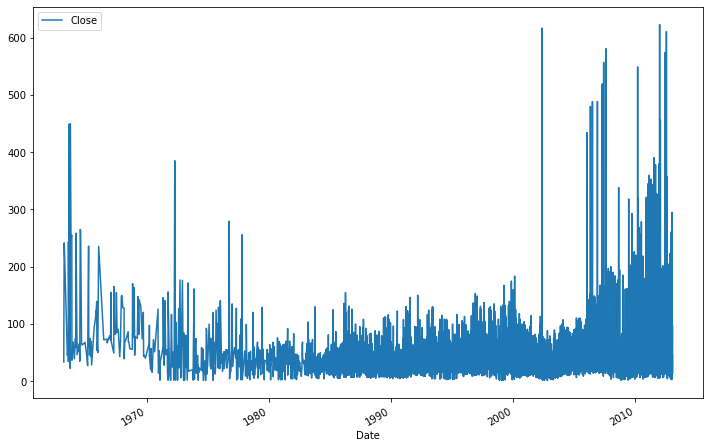

In [33]:
df.plot(x='Date', y='Close');

In [34]:
df.shape

(9997, 26)

In [35]:
def encode(arg):
    switcher = {
        'STAY': 0,
        'UP': 1,
        'DOWN': -1
    }
    return switcher.get(arg, -5)

In [36]:
encode('UP')

1

In [37]:
df['direction_encoded'] = df.apply(lambda x: encode(x['direction']), axis=1)

In [43]:
features = [
    'close_MIN_prior_5_days',
    'close_MIN_prior_20_days',
    'close_MIN_prior_260_days',
    'close_MAX_prior_5_days',
    'close_MAX_prior_20_days',
    'close_MAX_prior_260_days',
    'close_AVG_prior_5_days',
    'close_AVG_prior_20_days',
    'close_AVG_prior_260_days',
#     'symbol',
    'days_on_market',
    'scaled_change',
    's_p_scaled_change',
    'normalized_change'
]
target = 'direction_encoded'

X_train, X_test = df.loc[:8000, features], df.loc[8000:, features]
Y_train, Y_test = df.loc[:8000, target], df.loc[8000:, target]
# clf = OneVsRestClassifier(SVC()).fit(X_train, Y_train)
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
# y_pred = clf.predict(X_test)
print('RMSE: {0:.2f}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))

RMSE: 0.40


In [67]:
print('Variance Score: {0:.2f}'.format(r2_score(Y_test, y_pred)))

Variance Score: 0.57


No handles with labels found to put in legend.


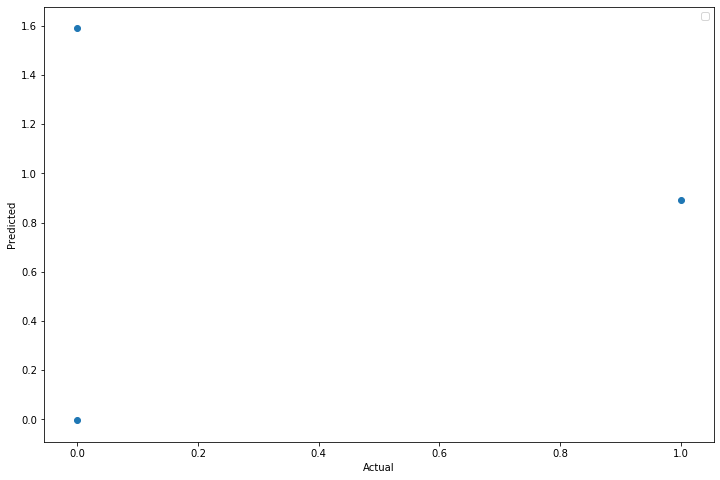

In [44]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();